In [8]:
from __future__ import print_function

In [9]:
%matplotlib inline

In [10]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
import json

In [165]:
from altair import Row, Column, Chart, Text, Scale, Color, X, Y, Bin, SortField

In [46]:
pd.set_option("display.max_columns",None)

Connect to SQLite DB

In [12]:
conn = sqlite3.connect('open_2017.db')
c = conn.cursor()

Helper function to convert columns to numeric

In [13]:
def convert_numeric(df, cols=None):
    if cols == None:
        cols = df.columns
    for c in cols:
        try:
            df[c].replace('NA', None)
            df[c] = pd.to_numeric(df[c], errors='coerce')
            print('Successfully converted {} to numeric'.format(c))
        except:
            print('Could not convert {} to numeric'.format(c))
    return df

Read tables into data frames

In [14]:
leaderboard_15_df = pd.read_sql_query("SELECT * FROM leaderboard_15", conn, coerce_float=True)
leaderboard_14_df = pd.read_sql_query("SELECT * FROM leaderboard_14", conn, coerce_float=True)
leaderboard_13_df = pd.read_sql_query("SELECT * FROM leaderboard_13", conn, coerce_float=True)

In [15]:
leaderboard_num_cols = [u'year', u'division', u'stage', u'athlete_id', u'rank', u'score',u'scaled']

In [16]:
leaderboard_15_df = convert_numeric(leaderboard_15_df,leaderboard_num_cols)
leaderboard_14_df = convert_numeric(leaderboard_14_df,leaderboard_num_cols)
leaderboard_13_df = convert_numeric(leaderboard_13_df,leaderboard_num_cols)

Successfully converted year to numeric
Successfully converted division to numeric
Successfully converted stage to numeric
Successfully converted athlete_id to numeric
Successfully converted rank to numeric
Successfully converted score to numeric
Successfully converted scaled to numeric
Successfully converted year to numeric
Successfully converted division to numeric
Successfully converted stage to numeric
Successfully converted athlete_id to numeric
Successfully converted rank to numeric
Successfully converted score to numeric
Successfully converted scaled to numeric
Successfully converted year to numeric
Successfully converted division to numeric
Successfully converted stage to numeric
Successfully converted athlete_id to numeric
Successfully converted rank to numeric
Successfully converted score to numeric
Successfully converted scaled to numeric


In [17]:
leaderboard_15_df.dtypes

year                    int64
division                int64
stage                 float64
athlete_id              int64
rank                  float64
score                 float64
retrieved_datetime     object
scaled                  int64
dtype: object

In [18]:
leaderboard_15_df['year_stage'] = leaderboard_15_df['year'] + leaderboard_15_df['stage']/10
leaderboard_14_df['year_stage'] = leaderboard_14_df['year'] + leaderboard_14_df['stage']/10
leaderboard_13_df['year_stage'] = leaderboard_13_df['year'] + leaderboard_13_df['stage']/10

In [19]:
leaderboard_15_df.head(3)

year  division  stage  athlete_id    rank  score   retrieved_datetime  \
0    15         1    5.0        1690   154.0  366.0  2015-03-31 21:44:44   
1    15         1    5.0        1998  5950.0  497.0  2015-03-31 21:44:44   
2    15         1    5.0        2206   768.0  404.0  2015-03-31 21:44:44   

   scaled  year_stage  
0       0        15.5  
1       0        15.5  
2       0        15.5

In [20]:
leaderboard_df = pd.read_sql_query("SELECT * FROM leaderboard", conn)

In [21]:
leaderboard_df.head(3)

athlete_name  athlete_id athlete_link  \
0         Pump Dragons           1   /athlete/1   
1  CrossFit Round Rock           5   /athlete/5   
2    CrossFit Coronado           7   /athlete/7   

                                                 pic          region_name  \
0  profilepicsbucket.crossfit.com/85309-T1_4-184.jpg  Northern California   
1  profilepicsbucket.crossfit.com/35029-T5_2-184.jpg        South Central   
2          profilepicsbucket.crossfit.com/pukies.png  Southern California   

   region_id  division            affiliate  affiliate_id  occupation  scaled  \
0         12        11   Container CrossFit          2553           0       0   
1         14        11  CrossFit Round Rock          3167           0       0   
2         16        11    CrossFit Coronado           348           0       0   

  age height weight POS  year total_points score1 score2 score3 score4 score5  \
0                    --  2017           --     --     --     --     --     --   
1                    --  2017           --     --     --     --     --     --   
2                    --  2017           --     --     --     --     --     --   

  score6 rank1 rank2 rank3 rank4 rank5 rank6 score_id1 score_id2 score_id3  \
0     --    --    --    --    --    --    --        --        --        --   
1     --    --    --    --    --    --    --        --        --        --   
2     --    --    --    --    --    --    --        --        --        --   

  score_id4 score_id5 score_id6  
0        --        --        --  
1        --        --        --  
2        --        --        --

Athletes

In [22]:
athletes_df = pd.read_sql_query("SELECT * FROM athletesB", conn, coerce_float=True)

In [23]:
athlete_num_cols = [u'athlete_id',
       u'age', u'height', u'weight', u'fran', u'helen', u'grace', u'filthy50',
       u'fgonebad', u'run400', u'run5k', u'candj', u'snatch', u'deadlift',
       u'backsq', u'pullups']

In [24]:
athletes_df = convert_numeric(athletes_df, athlete_num_cols)

Successfully converted athlete_id to numeric
Successfully converted age to numeric
Successfully converted height to numeric
Successfully converted weight to numeric
Successfully converted fran to numeric
Successfully converted helen to numeric
Successfully converted grace to numeric
Successfully converted filthy50 to numeric
Successfully converted fgonebad to numeric
Successfully converted run400 to numeric
Successfully converted run5k to numeric
Successfully converted candj to numeric
Successfully converted snatch to numeric
Successfully converted deadlift to numeric
Successfully converted backsq to numeric
Successfully converted pullups to numeric


In [25]:
athletes_df['gender_num'] = 0
athletes_df.loc[athletes_df['gender'] == 'Male', 'gender_num'] = 1

In [26]:
athletes_df.head()

athlete_id           name               region          team  \
0      2554.0      Pj Ablang           South West   Double Edge   
1      3517.0  Derek Abdella                                      
2      4691.0             NA                   NA            NA   
3      5164.0    Abo Brandon  Southern California  LAX CrossFit   
4      5286.0    Bryce Abbey                                      

              affiliate gender   age  height  weight   fran  helen  grace  \
0  Double Edge CrossFit   Male  24.0    70.0   166.0    NaN    NaN    NaN   
1                         Male  42.0    70.0   190.0    NaN    NaN    NaN   
2                    NA     NA   NaN     NaN     NaN    NaN    NaN    NaN   
3          LAX CrossFit   Male  40.0    67.0     NaN  211.0  645.0  300.0   
4                         Male  32.0    65.0   149.0  206.0  465.0    NaN   

   filthy50  fgonebad  run400   run5k  candj  snatch  deadlift  backsq  \
0       NaN       NaN     NaN     NaN  220.0     NaN     400.0   305.0   
1       NaN       0.0     NaN     NaN    NaN     NaN       NaN     NaN   
2       NaN       NaN     NaN     NaN    NaN     NaN       NaN     NaN   
3       NaN     196.0     NaN     NaN  245.0   200.0     375.0   325.0   
4    1053.0       NaN     NaN  1081.0  205.0   150.0       NaN   325.0   

   pullups                                                eat  \
0      NaN                                                      
1      NaN                                                      
2      NaN                                                 NA   
3     25.0               I eat 1-3 full cheat meals per week|   
4     50.0  I eat quality foods but don't measure the amount|   

                                               train  \
0  I workout mostly at a CrossFit Affiliate|I hav...   
1  I have a coach who determines my programming|I...   
2                                                 NA   
3  I workout mostly at a CrossFit Affiliate|I hav...   
4  I workout mostly at a CrossFit Affiliate|I inc...   

                                          background  \
0  I played youth or high school level sports|I r...   
1        I played youth or high school level sports|   
2                                                 NA   
3        I played youth or high school level sports|   
4                           I played college sports|   

                                          experience  \
0  I began CrossFit with a coach (e.g. at an affi...   
1  I began CrossFit with a coach (e.g. at an affi...   
2                                                 NA   
3  I began CrossFit by trying it alone (without a...   
4  I began CrossFit by trying it alone (without a...   

                                            schedule     howlong  \
0         I do multiple workouts in a day 2x a week|   4+ years|   
1         I do multiple workouts in a day 2x a week|   4+ years|   
2                                                 NA          NA   
3                 I usually only do 1 workout a day|   4+ years|   
4  I usually only do 1 workout a day|I strictly s...  1-2 years|   

  retrieved_datetime  gender_num  
0                              1  
1                              1  
2                              0  
3                              1  
4                              1

Pivot data frames

In [27]:
lb15_pivot = pd.pivot_table(leaderboard_15_df, values='score', index=[ 'athlete_id', 'division'], columns=['year_stage'], aggfunc='mean')
lb15_pivot.reset_index(inplace=True)
lb15_pivot.head(5)

year_stage  athlete_id  division   15.1  15.11   15.2   15.3   15.4   15.5
0                   82         1    NaN    NaN    NaN    NaN    NaN    NaN
1                   84         1  153.0  205.0  125.0  356.0   97.0  717.0
2                   86         1  149.0  232.0  117.0  342.0   46.0  518.0
3                   87         2  116.0  115.0   47.0  541.0   75.0    NaN
4                   88         1  188.0  306.0  267.0  491.0  117.0  408.0

In [28]:
lb14_pivot = pd.pivot_table(leaderboard_14_df, values='score', index=[ 'athlete_id', 'division'], columns=['year_stage'], aggfunc='mean')
lb14_pivot.reset_index(inplace=True)
lb14_pivot.head(5)

year_stage  athlete_id  division  14.0   14.1   14.2   14.3   14.4    14.5
0                   82         1   0.0  169.0   35.0   93.0  160.0  1568.0
1                   83         1   0.0    NaN    NaN    NaN    NaN     NaN
2                   84         1   0.0  308.0  137.0  139.0  187.0   887.0
3                   86         1   0.0  306.0  132.0  111.0  190.0  1051.0
4                   87         2   0.0  215.0   61.0   66.0    NaN     NaN

Merge 2015 and 2016

In [29]:
leaderboard_df = pd.merge(lb14_pivot, lb15_pivot, on=['athlete_id', 'division'], how='outer')
leaderboard_df.set_index('athlete_id', inplace=True)
leaderboard_df.index.names

FrozenList([u'athlete_id'])

In [30]:
leaderboard_df.reset_index().head()

year_stage  athlete_id  division  14.0   14.1   14.2   14.3   14.4    14.5  \
0                   82         1   0.0  169.0   35.0   93.0  160.0  1568.0   
1                   83         1   0.0    NaN    NaN    NaN    NaN     NaN   
2                   84         1   0.0  308.0  137.0  139.0  187.0   887.0   
3                   86         1   0.0  306.0  132.0  111.0  190.0  1051.0   
4                   87         2   0.0  215.0   61.0   66.0    NaN     NaN   

year_stage   15.1  15.11   15.2   15.3  15.4   15.5  
0             NaN    NaN    NaN    NaN   NaN    NaN  
1             NaN    NaN    NaN    NaN   NaN    NaN  
2           153.0  205.0  125.0  356.0  97.0  717.0  
3           149.0  232.0  117.0  342.0  46.0  518.0  
4           116.0  115.0   47.0  541.0  75.0    NaN

In [31]:
leaderboard_df.columns

Index([u'division',        14.0,        14.1,        14.2,        14.3,
              14.4,        14.5,        15.1,       15.11,        15.2,
              15.3,        15.4,        15.5],
      dtype='object', name=u'year_stage')

Merge Athlete data to Leaderboard

In [32]:
results_df = pd.merge(leaderboard_df.reset_index(), athletes_df, on='athlete_id', how='left')

In [33]:
results_df['height'].replace('NA', None, inplace=True)
results_df['height'] = pd.to_numeric(results_df['height'])
results_df['weight'].replace('NA', None, inplace=True)
results_df['weight'] = pd.to_numeric(results_df['weight'])
results_df['age'].replace('NA', None, inplace=True)
results_df['age'] = pd.to_numeric(results_df['age'])

In [34]:
results_df.head(3)

athlete_id  division  14.0   14.1   14.2   14.3   14.4    14.5   15.1  \
0          82         1   0.0  169.0   35.0   93.0  160.0  1568.0    NaN   
1          83         1   0.0    NaN    NaN    NaN    NaN     NaN    NaN   
2          84         1   0.0  308.0  137.0  139.0  187.0   887.0  153.0   

   15.11   15.2   15.3  15.4   15.5           name               region  \
0    NaN    NaN    NaN   NaN    NaN      Adam Reed  Northern California   
1    NaN    NaN    NaN   NaN    NaN    Bill McGair                        
2  205.0  125.0  356.0  97.0  717.0  Ryan Johnston  Northern California   

                       team                 affiliate gender   age  height  \
0              Games Team 2        Container CrossFit   Male  28.0    73.0   
1                                                       Male  47.0     NaN   
2  LaLanne Fitness CrossFit  LaLanne Fitness CrossFit   Male  25.0    68.0   

   weight   fran  helen  grace  filthy50  fgonebad  run400   run5k  candj  \
0   192.0    NaN    NaN    NaN       NaN       0.0    82.0  1440.0  175.0   
1     NaN    NaN    NaN    NaN       NaN       NaN     NaN     NaN    NaN   
2   160.0  182.0    NaN  146.0    1406.0     322.0     NaN  1162.0  215.0   

   snatch  deadlift  backsq  pullups  \
0     0.0     280.0   225.0      2.0   
1     NaN       NaN     NaN      NaN   
2   195.0     450.0   330.0      NaN   

                                                 eat  \
0  I eat strict Paleo|I eat quality foods but don...   
1  I eat quality foods but don't measure the amount|   
2  I eat quality foods but don't measure the amou...   

                                               train  \
0  I workout mostly at a CrossFit Affiliate|I hav...   
1  I workout mostly at home, work, or a tradition...   
2  I workout mostly at a CrossFit Affiliate|I wri...   

                                        background  \
0  I have no athletic background besides CrossFit|   
1  I have no athletic background besides CrossFit|   
2      I played youth or high school level sports|   

                                          experience  \
0  I began CrossFit with a coach (e.g. at an affi...   
1  I began CrossFit with a coach (e.g. at an affi...   
2  I began CrossFit with a coach (e.g. at an affi...   

                                            schedule     howlong  \
0  I usually only do 1 workout a day|I typically ...  2-4 years|   
1                 I usually only do 1 workout a day|               
2                 I usually only do 1 workout a day|   4+ years|   

  retrieved_datetime  gender_num  
0                            1.0  
1                            1.0  
2                            1.0

Create Correlation Matrix

In [35]:
del(results_df[14.0])
corr = results_df.corr()


In [36]:
corr

athlete_id  division      14.1      14.2      14.3      14.4  \
athlete_id    1.000000  0.079185 -0.427728 -0.417465 -0.360247 -0.311776   
division      0.079185  1.000000 -0.225499 -0.369554 -0.163880 -0.402219   
14.1         -0.427728 -0.225499  1.000000  0.736888  0.659383  0.674848   
14.2         -0.417465 -0.369554  0.736888  1.000000  0.617080  0.670006   
14.3         -0.360247 -0.163880  0.659383  0.617080  1.000000  0.564861   
14.4         -0.311776 -0.402219  0.674848  0.670006  0.564861  1.000000   
14.5          0.327072  0.096631 -0.696171 -0.644659 -0.647811 -0.666789   
15.1         -0.034378  0.030216  0.435107  0.532303  0.399060  0.382422   
15.11        -0.367038 -0.748285  0.536320  0.649567  0.517231  0.572869   
15.2         -0.324880 -0.337125  0.659426  0.820923  0.554666  0.618451   
15.3          0.193825  0.383354 -0.179968 -0.255502 -0.121563 -0.289469   
15.4         -0.012922  0.143637  0.191233  0.279690  0.232510 -0.000940   
15.5          0.296770  0.192302 -0.615603 -0.615690 -0.617552 -0.537281   
age          -0.102846 -0.012719 -0.235304 -0.211300 -0.134931 -0.170841   
height       -0.001571 -0.002025 -0.000049 -0.002311 -0.000039  0.000048   
weight       -0.048072 -0.542704  0.076799  0.132147  0.178324  0.118341   
fran          0.009921 -0.004702 -0.000828 -0.000240  0.004727  0.001287   
helen         0.013928 -0.004435 -0.004000 -0.000118  0.004604 -0.016487   
grace        -0.001564  0.006159 -0.012967 -0.005270 -0.007274 -0.001935   
filthy50      0.005195 -0.004560 -0.007014 -0.001628  0.004398 -0.059525   
fgonebad      0.000587 -0.008419  0.011295  0.016723  0.003665  0.007511   
run400       -0.001240 -0.004149  0.003188  0.004236  0.005140  0.003753   
run5k         0.003631 -0.000393  0.004800  0.000961  0.007412  0.001045   
candj        -0.001924 -0.003902  0.003720  0.004566  0.007673  0.004461   
snatch       -0.002062 -0.003659  0.003981  0.004192  0.008120  0.004328   
deadlift     -0.003667 -0.003125  0.003037  0.001444  0.008847  0.004112   
backsq       -0.001851 -0.005674  0.001571  0.001949  0.005661  0.003580   
pullups      -0.003822 -0.002800 -0.001186  0.001860  0.004530  0.003034   
gender_num   -0.032494 -0.788390  0.281472  0.384204  0.213474  0.362716   

                14.5      15.1     15.11      15.2      15.3      15.4  \
athlete_id  0.327072 -0.034378 -0.367038 -0.324880  0.193825 -0.012922   
division    0.096631  0.030216 -0.748285 -0.337125  0.383354  0.143637   
14.1       -0.696171  0.435107  0.536320  0.659426 -0.179968  0.191233   
14.2       -0.644659  0.532303  0.649567  0.820923 -0.255502  0.279690   
14.3       -0.647811  0.399060  0.517231  0.554666 -0.121563  0.232510   
14.4       -0.666789  0.382422  0.572869  0.618451 -0.289469 -0.000940   
14.5        1.000000 -0.464866 -0.432075 -0.620945  0.115865 -0.198885   
15.1       -0.464866  1.000000  0.086504  0.428474  0.053698  0.339132   
15.11      -0.432075  0.086504  1.000000  0.574046 -0.374602 -0.001863   
15.2       -0.620945  0.428474  0.574046  1.000000 -0.183463  0.199233   
15.3        0.115865  0.053698 -0.374602 -0.183463  1.000000  0.252818   
15.4       -0.198885  0.339132 -0.001863  0.199233  0.252818  1.000000   
15.5        0.730523 -0.394613 -0.512015 -0.575361  0.019600 -0.249362   
age         0.221263 -0.036107 -0.150597 -0.171767  0.090135 -0.005124   
height      0.000265 -0.004721  0.000383 -0.001773 -0.001953 -0.002382   
weight      0.028049 -0.058270  0.506828  0.061515 -0.117730  0.046179   
fran        0.005481 -0.003449  0.006573 -0.003112  0.005205 -0.006698   
helen       0.020752 -0.004521  0.015961 -0.002938  0.007821 -0.006716   
grace       0.005756 -0.007056 -0.008925 -0.006005  0.011605 -0.008798   
filthy50    0.089548 -0.000114  0.015320 -0.001437 -0.003743 -0.000471   
fgonebad   -0.010353  0.000851  0.004576  0.000476 -0.002914 -0.002697   
run400     -0.005053  0.002744  0.003416  0.002848 -0.002437  0.001654   
run5k      -0.000435  0.00067

### PLOT!

Pandas Plotting

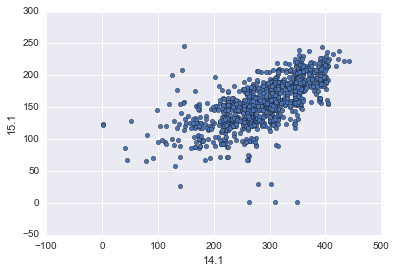

In [37]:
results_df.dropna().plot.scatter(x=14.1, y=15.1)

Seaborn

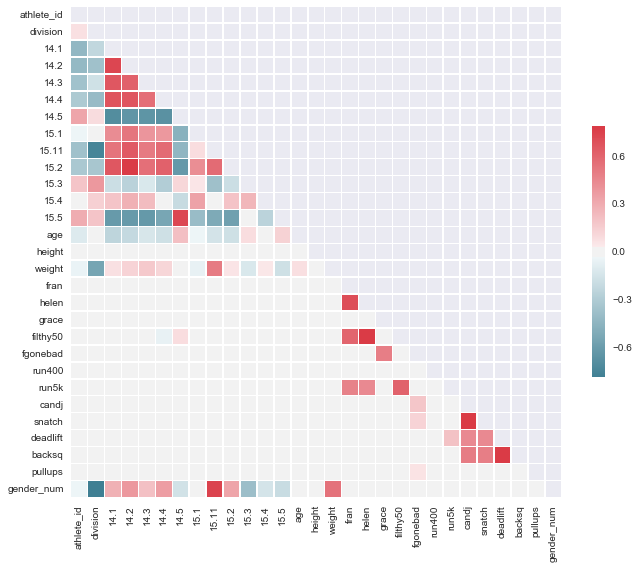

In [38]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, #xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Altair

In [39]:
def heatmap(data, row, column, color, cellsize=(50, 15)):
    """Create an Altair Heat-Map

    Parameters
    ----------
    row, column, color : str
        Altair trait shorthands
    cellsize : tuple
        specify (width, height) of cells in pixels
    """
    return Chart(data).mark_text(
               applyColorToBackground=True,
           ).encode(
               row=row,
               column=column,
               text=Text(value=' '),
               color=Color(field=color, scale=Scale(range=["#1a9641", "#ffffff", "#d7191c"], domain=[-1,0,1]) )
           ).configure_scale(
               textBandWidth=cellsize[0],
               bandSize=cellsize[1],
               nominalColorRange='category20'
           )

In [40]:
corr_stack = corr.stack().reset_index().rename(columns={0:'corr'})
corr_stack

level_0     level_1      corr
0    athlete_id  athlete_id  1.000000
1    athlete_id    division  0.079185
2    athlete_id        14.1 -0.427728
3    athlete_id        14.2 -0.417465
4    athlete_id        14.3 -0.360247
5    athlete_id        14.4 -0.311776
6    athlete_id        14.5  0.327072
7    athlete_id        15.1 -0.034378
8    athlete_id       15.11 -0.367038
9    athlete_id        15.2 -0.324880
10   athlete_id        15.3  0.193825
11   athlete_id        15.4 -0.012922
12   athlete_id        15.5  0.296770
13   athlete_id         age -0.102846
14   athlete_id      height -0.001571
15   athlete_id      weight -0.048072
16   athlete_id        fran  0.009921
17   athlete_id       helen  0.013928
18   athlete_id       grace -0.001564
19   athlete_id    filthy50  0.005195
20   athlete_id    fgonebad  0.000587
21   athlete_id      run400 -0.001240
22   athlete_id       run5k  0.003631
23   athlete_id       candj -0.001924
24   athlete_id      snatch -0.002062
25   athlete_id    deadlift -0.003667
26   athlete_id      backsq -0.001851
27   athlete_id     pullups -0.003822
28   athlete_id  gender_num -0.032494
29     division  athlete_id  0.079185
..          ...         ...       ...
811     pullups  gender_num  0.002801
812  gender_num  athlete_id -0.032494
813  gender_num    division -0.788390
814  gender_num        14.1  0.281472
815  gender_num        14.2  0.384204
816  gender_num        14.3  0.213474
817  gender_num        14.4  0.362716
818  gender_num        14.5 -0.157177
819  gender_num        15.1 -0.030379
820  gender_num       15.11  0.747304
821  gender_num        15.2  0.336475
822  gender_num        15.3 -0.382962
823  gender_num        15.4 -0.143733
824  gender_num        15.5 -0.192063
825  gender_num         age  0.012614
826  gender_num      height  0.002026
827  gender_num      weight  0.542848
828  gender_num        fran  0.004703
829  gender_num       helen  0.004436
830  gender_num       grace -0.006159
831  gender_num    filthy50  0.004562
832  gender_num    fgonebad  0.008420
833  gender_num      run400  0.004156
834  gender_num       run5k  0.000395
835  gender_num       candj  0.003903
836  gender_num      snatch  0.003659
837  gender_num    deadlift  0.003126
838  gender_num      backsq  0.005675
839  gender_num     pullups  0.002801
840  gender_num  gender_num  1.000000

[841 rows x 3 columns]

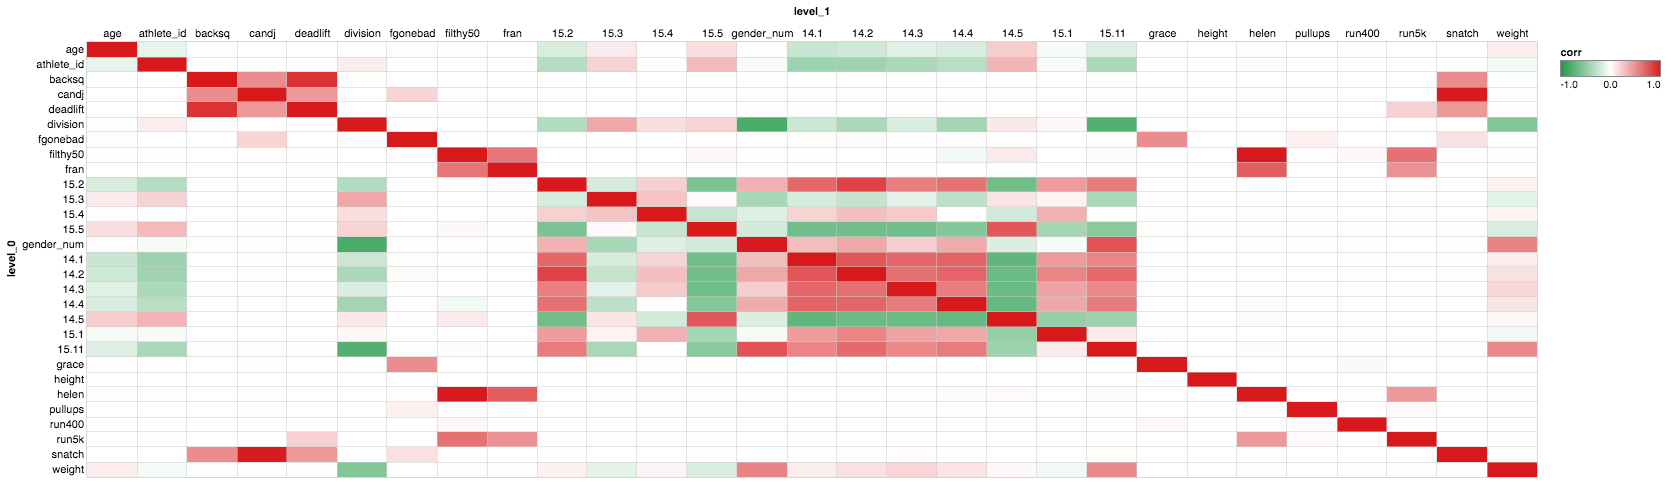

In [41]:
heatmap(corr_stack, row='level_0', column='level_1', color='corr')

In [42]:
num_bins = 20+1
def define_bins(S):
    max_val = int(np.max(S))
    min_val = int(np.min(S))
    min_val = 0
    range_val = max_val - min_val
    interval = int(np.ceil(range_val/(num_bins-1)/2)*2)
    interval_max = int(min_val + (num_bins-1)*interval)
    print(min_val, max_val, range_val, interval, interval_max)
    return min_val, max_val, range_val, interval, interval_max

In [43]:
def create_score_hist(results_df, col, maxbins=30.0):
    score_df = pd.DataFrame(results_df[col])
    score_df.columns = ['score']
    score_df.dropna(inplace=True)
    
    hist_chart = Chart(score_df).mark_bar().encode(
        x=X('score:Q',
           bin=Bin(
                maxbins=maxbins,
            ),
           ),
        y='count(*):Q'
    )
    return hist_chart, score_df

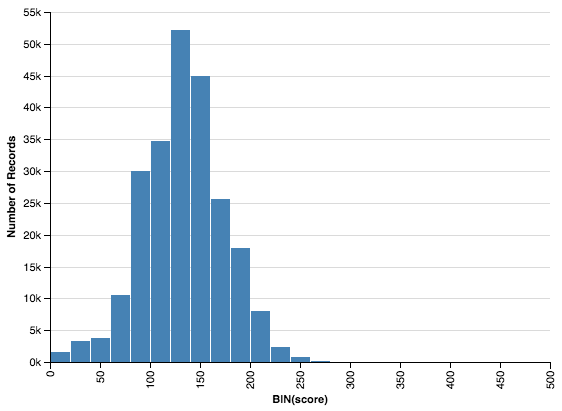

In [44]:
hist_chart, score_df = create_score_hist(results_df, 15.1)
hist_chart

In [45]:
hist_chart.savechart('test_chart.html')

In [83]:
step = 50
bin_range = np.arange(0, 500+step, step)
out, bins  = pd.cut(results_df[15.1], bins=bin_range, include_lowest=True, right=False, retbins=True, labels=bin_range[1:]/2)
out.value_counts(sort=False)

25       6087
50      43080
75     106339
100     69022
125     10952
150       499
175        15
200         2
225         0
250         1
Name: 15.1, dtype: int64

In [84]:
s = results_df[15.1]

In [85]:
np.max(s)

450.0

In [144]:
def hist_series(s, step=None, min_range=0, max_range=None, num_steps=20):
    if max_range is None:
        max_range = np.max(s)
    
    if (step is None) and (type(num_steps) is int):
        step = np.ceil(max_range / num_steps / 10) * 10

    bin_range = np.arange(min_range, max_range + step, step)
    out, bins = pd.cut(s, bins=bin_range, include_lowest=True, right=False, retbins=True,
                       labels=bin_range[1:] / 2)
    hist_s = out.value_counts(sort=False)
    
    hist_df = pd.DataFrame(hist_s)
    hist_df.reset_index(inplace=True)
    hist_df.columns = ['Score Range', 'Number of Scores']
    hist_df.sort_values('Score Range', ascending=True, inplace=True)
    hist_df.reset_index(inplace=True)
    del(hist_df['index'])
    
    return hist_df

In [168]:
hist_df = hist_series(s, num_steps=20)
hist_df

Score Range  Number of Scores
0         15.0              3429
1         30.0              5292
2         45.0             19659
3         60.0             55510
4         75.0             71616
5         90.0             51047
6        105.0             22816
7        120.0              5552
8        135.0               943
9        150.0               115
10       165.0                13
11       180.0                 2
12       195.0                 2
13       210.0                 0
14       225.0                 0

In [205]:
def create_score_hist(s, num_steps=20):
    hist_df = hist_series(s, num_steps=num_steps)

    hist_chart = Chart(hist_df).mark_bar().encode(
        x=X('Score Range:N',
#             scale=Scale(bandSize=25.0),
            sort=SortField(field='Score Range', order='descending'),
            ),
        y=Y('Number of Scores:Q')
    )
    return hist_chart, hist_df

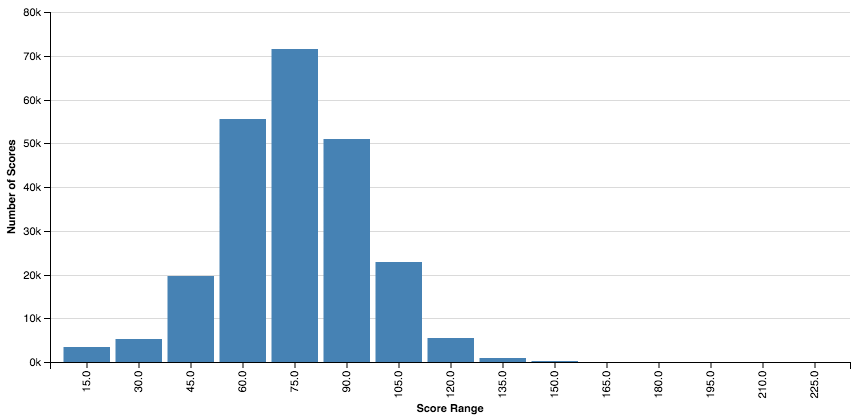

In [212]:
hist, df = create_score_hist(s)
# hist.configure_cell(height=300, width=800)

hist.width = 800
hist

In [181]:
hist_chart_json = hist_df.to_json()
hist_chart_json = json.loads(hist_chart_json)
hist_chart_json

{u'Number of Scores': {u'0': 3429,
  u'1': 5292,
  u'10': 13,
  u'11': 2,
  u'12': 2,
  u'13': 0,
  u'14': 0,
  u'2': 19659,
  u'3': 55510,
  u'4': 71616,
  u'5': 51047,
  u'6': 22816,
  u'7': 5552,
  u'8': 943,
  u'9': 115},
 u'Score Range': {u'0': 15.0,
  u'1': 30.0,
  u'10': 165.0,
  u'11': 180.0,
  u'12': 195.0,
  u'13': 210.0,
  u'14': 225.0,
  u'2': 45.0,
  u'3': 60.0,
  u'4': 75.0,
  u'5': 90.0,
  u'6': 105.0,
  u'7': 120.0,
  u'8': 135.0,
  u'9': 150.0}}

In [182]:
hist_chart, hist_df = create_score_hist(s)
hist_chart_json = hist_chart.to_json()
hist_chart_json = json.loads(hist_chart_json)
hist_chart_json

{u'data': {u'values': [{u'Number of Scores': 3429, u'Score Range': u'15.0'},
   {u'Number of Scores': 5292, u'Score Range': u'30.0'},
   {u'Number of Scores': 19659, u'Score Range': u'45.0'},
   {u'Number of Scores': 55510, u'Score Range': u'60.0'},
   {u'Number of Scores': 71616, u'Score Range': u'75.0'},
   {u'Number of Scores': 51047, u'Score Range': u'90.0'},
   {u'Number of Scores': 22816, u'Score Range': u'105.0'},
   {u'Number of Scores': 5552, u'Score Range': u'120.0'},
   {u'Number of Scores': 943, u'Score Range': u'135.0'},
   {u'Number of Scores': 115, u'Score Range': u'150.0'},
   {u'Number of Scores': 13, u'Score Range': u'165.0'},
   {u'Number of Scores': 2, u'Score Range': u'180.0'},
   {u'Number of Scores': 2, u'Score Range': u'195.0'},
   {u'Number of Scores': 0, u'Score Range': u'210.0'},
   {u'Number of Scores': 0, u'Score Range': u'225.0'}]},
 u'encoding': {u'x': {u'field': u'Score Range',
   u'scale': {u'bandSize': 50.0},
   u'sort': {u'field': u'Score Range', u'or